In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score


In [319]:
df = pd.read_csv('/Users/jestin/Documents/coding/data scince/ML/ML sundaram/10th Dec 2024/BostonHousing.csv')

In [320]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [321]:
# duplicate data
df.duplicated().sum()


0

In [322]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [323]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.61,8.60,0.01,0.08,0.26,3.68,88.98
zn,506.0,11.36,23.32,0.00,0.00,0.00,12.50,100.00
indus,506.0,11.14,6.86,0.46,5.19,9.69,18.10,27.74
chas,506.0,0.07,0.25,0.00,0.00,0.00,0.00,1.00
nox,506.0,0.55,0.12,0.38,0.45,0.54,0.62,0.87
rm,506.0,6.28,0.70,3.56,5.89,6.21,6.62,8.78
age,506.0,68.57,28.15,2.90,45.02,77.50,94.07,100.00
dis,506.0,3.80,2.11,1.13,2.10,3.21,5.19,12.13
rad,506.0,9.55,8.71,1.00,4.00,5.00,24.00,24.00
tax,506.0,408.24,168.54,187.00,279.00,330.00,666.00,711.00


In [324]:
df.isna().sum() 

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [325]:
df.skew()

crim       5.223149
zn         2.225666
indus      0.295022
chas       3.405904
nox        0.729308
rm         0.403612
age       -0.598963
dis        1.011781
rad        1.004815
tax        0.669956
ptratio   -0.802325
b         -2.890374
lstat      0.906460
medv       1.108098
dtype: float64

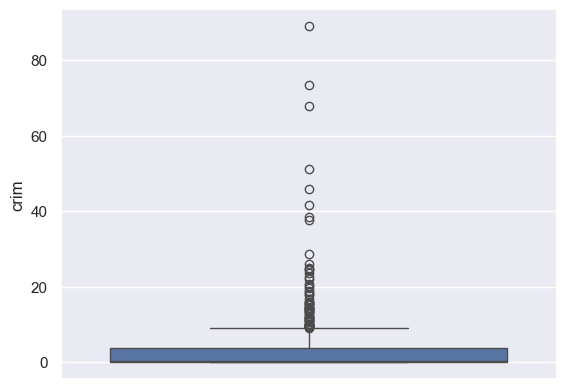

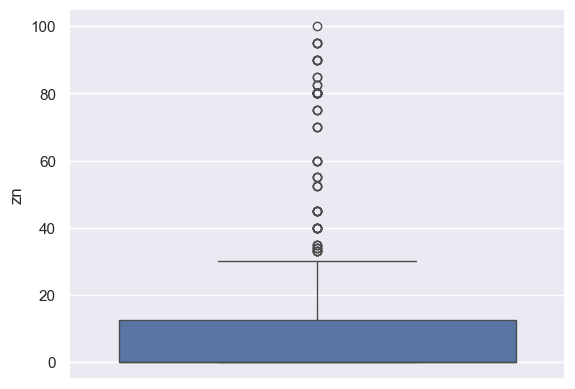

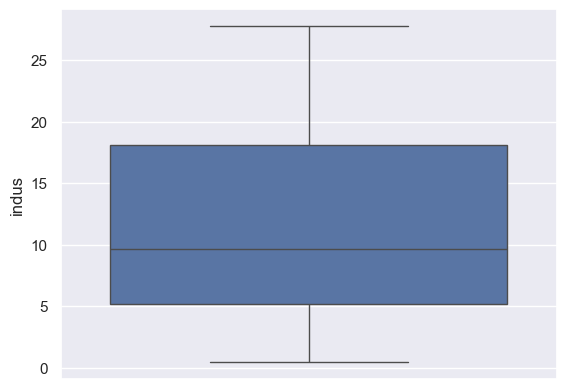

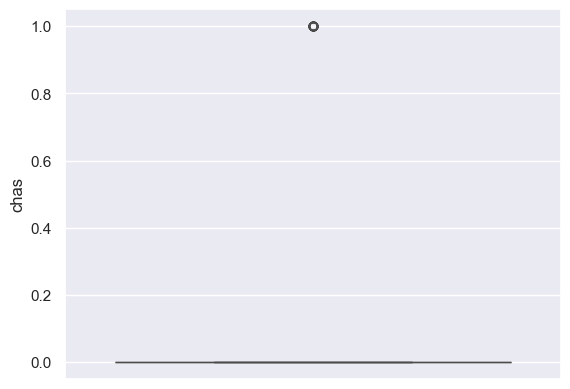

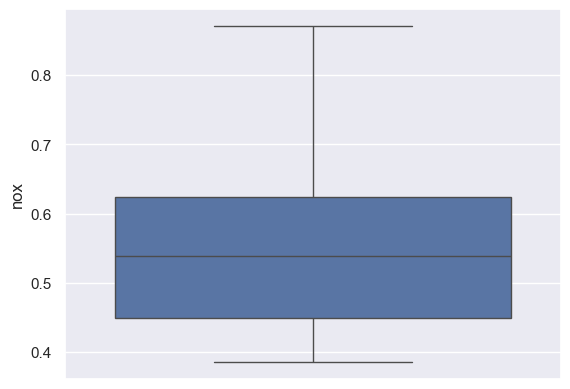

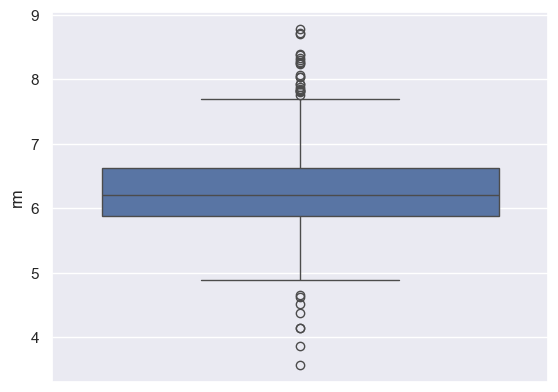

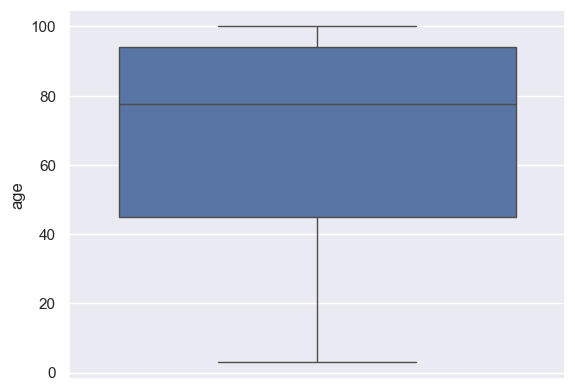

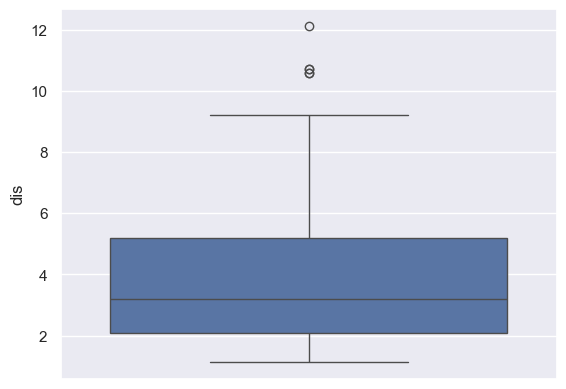

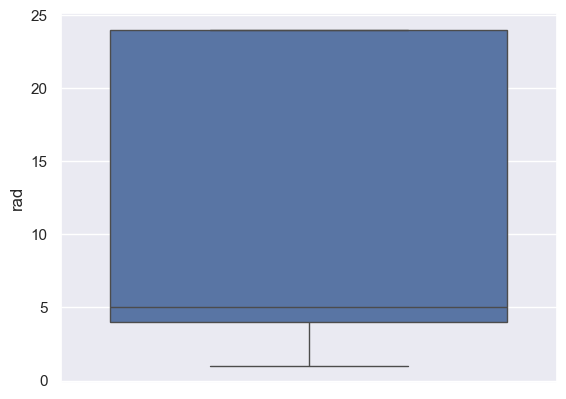

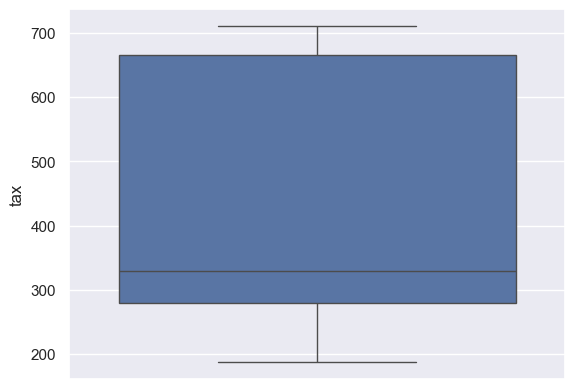

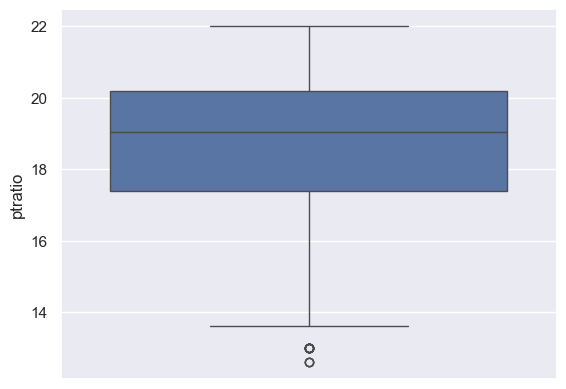

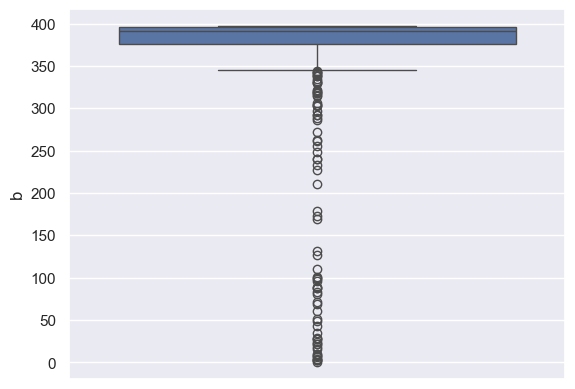

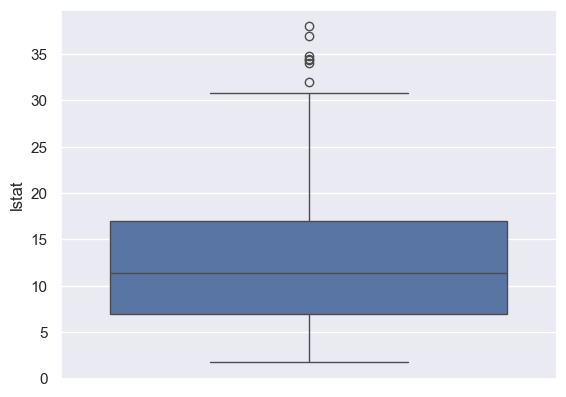

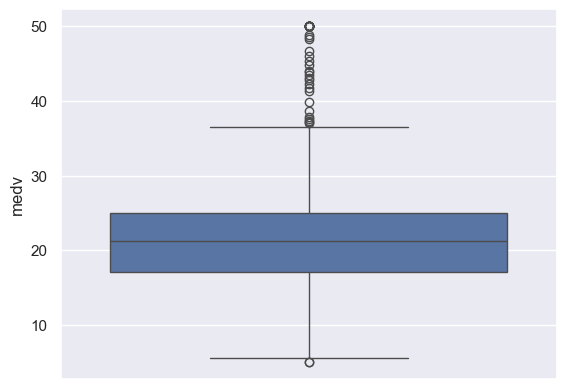

In [326]:
#  Box plot to find out Outliers

def boxplots(col):
    sns.boxplot(df[col])
    plt.show()

for i in list(df.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)


In [327]:
# lstat, b, crim, zn, chass, rm, dis,

In [328]:
# check corelation part
df.corr().round(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
zn,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
indus,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
chas,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
nox,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
rm,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
age,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
dis,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
rad,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
tax,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


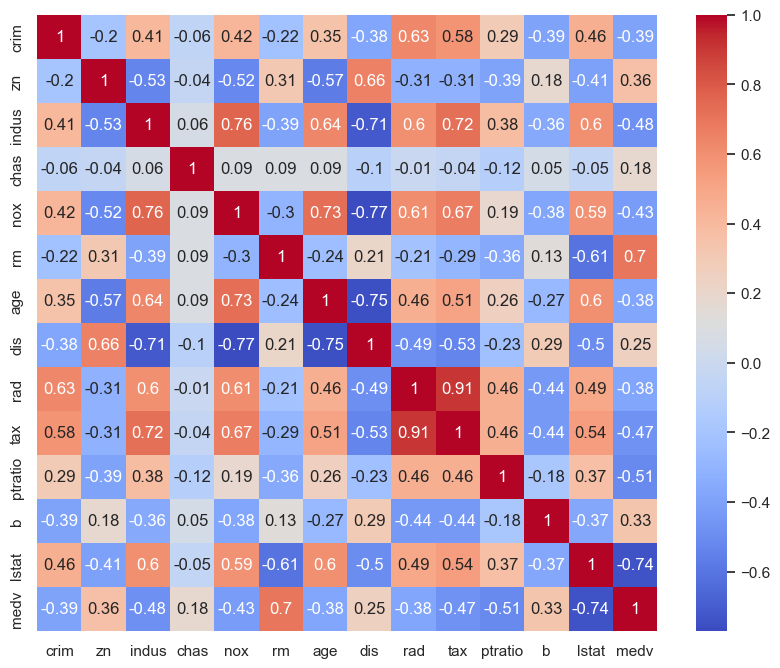

In [329]:
# heat map

plt.figure(figsize = (10,8))
sns.heatmap(df.corr().round(2),annot = True, cmap = 'coolwarm')
plt.show()


In [330]:
df.describe()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# IQR Methodm
### Outlier Treatment
### crim, zn, rm, b

In [331]:
df['crim'].describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: crim, dtype: float64

In [332]:
Q1 = 0.082
Q3 = 3.677
IQR = Q3- Q1
upper_limit = Q3+ 1.5* IQR 
lower_limit = Q1- - 1.5* IQR
df['crim'] = np.where(df['crim']> upper_limit,upper_limit,df['crim'])

In [333]:
df['zn'].describe()

count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: zn, dtype: float64

In [334]:
Q1 = 0.00
Q3 = 12.50
IQR = Q3- Q1
upper_limit = Q3+ 1.5* IQR 
lower_limit = Q1- - 1.5* IQR
df['zn'] = np.where(df['zn']> upper_limit,upper_limit,df['zn'])

In [335]:
df['b'].describe()

count    506.000000
mean     356.674032
std       91.294864
min        0.320000
25%      375.377500
50%      391.440000
75%      396.225000
max      396.900000
Name: b, dtype: float64

In [336]:
Q1 = 375.37
Q3 = 396.22
IQR = Q3 - Q1
upper_limit = Q3 +1.5* IQR
lower_limit = Q1 - 1.5 * IQR
df['b']= np.where(df['b']<lower_limit,lower_limit,df['b'])
df['b'].describe()

count    506.000000
mean     381.917125
std       19.058317
min      344.095000
25%      375.377500
50%      391.440000
75%      396.225000
max      396.900000
Name: b, dtype: float64

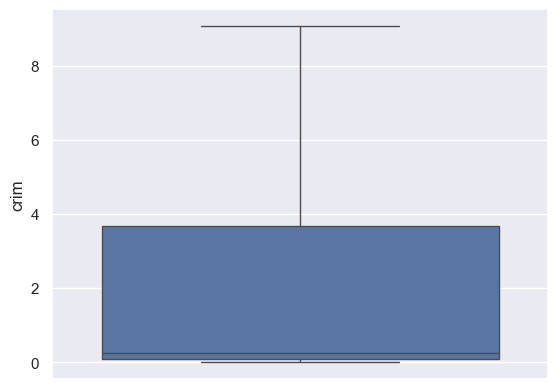

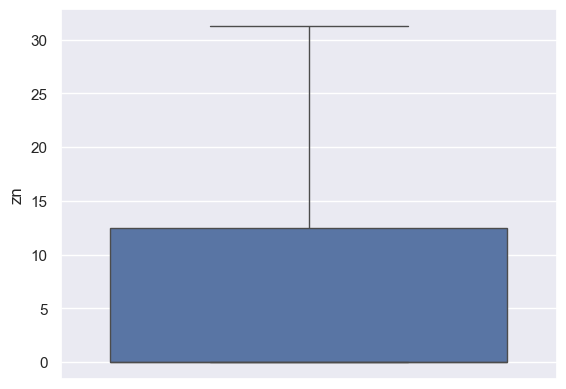

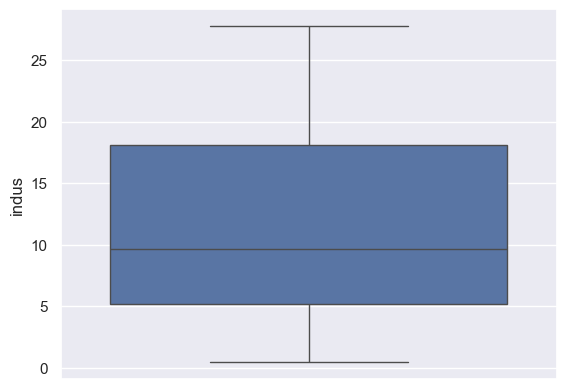

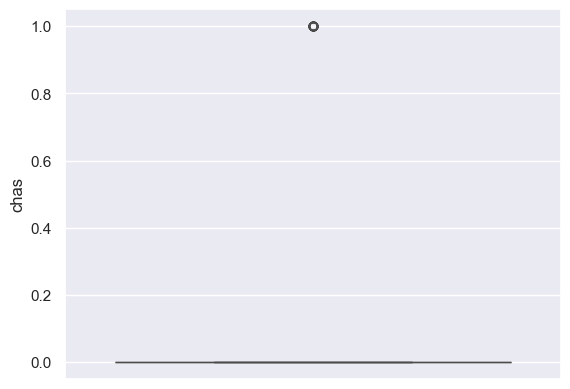

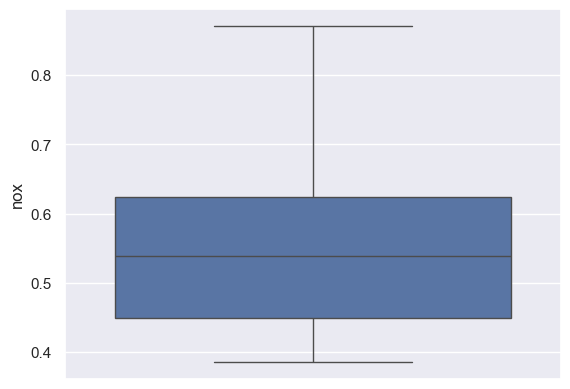

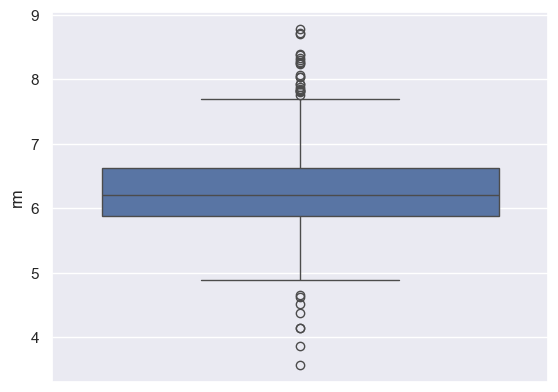

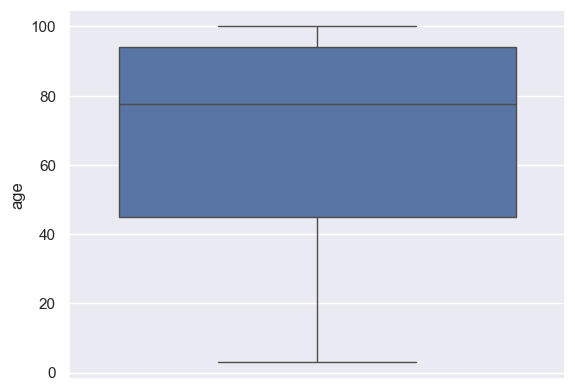

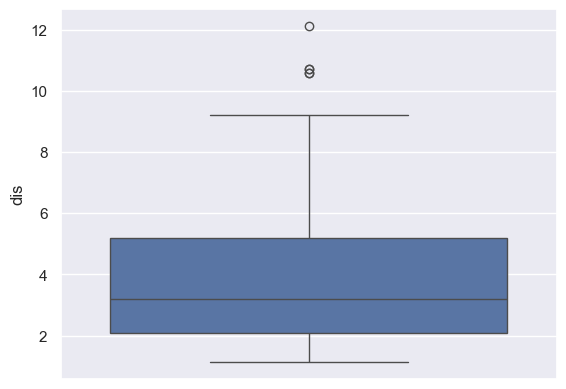

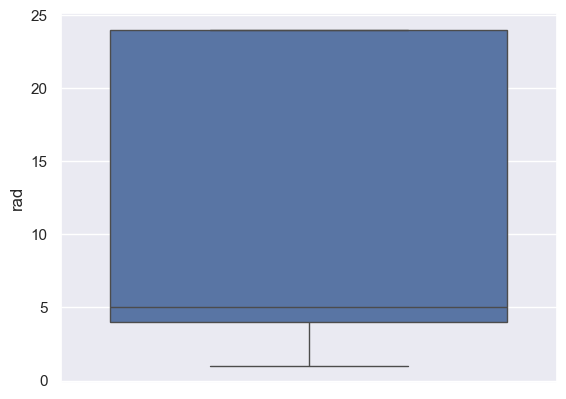

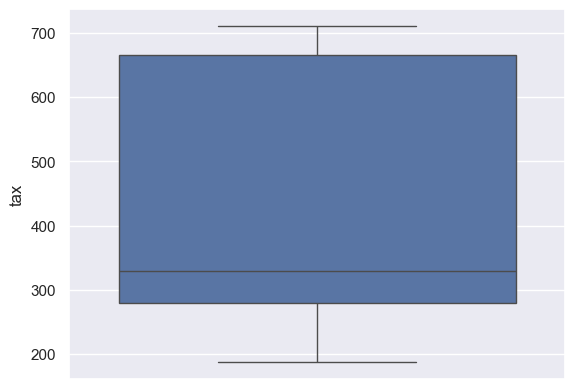

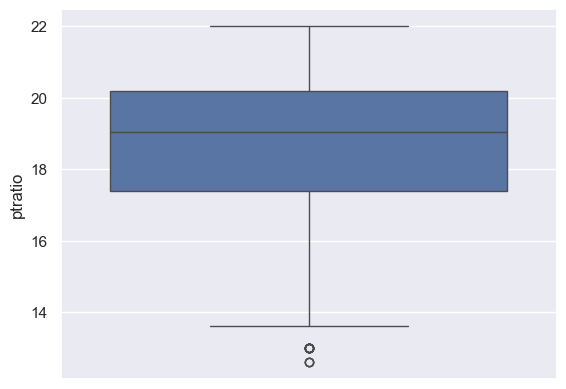

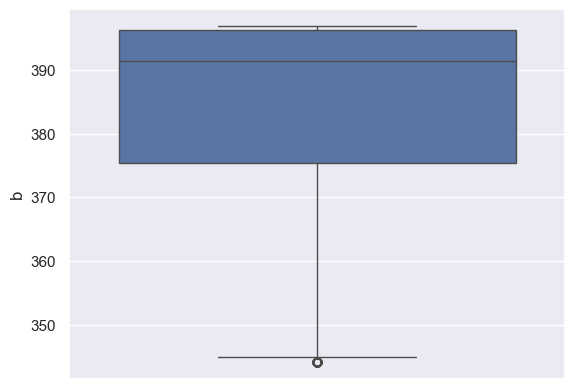

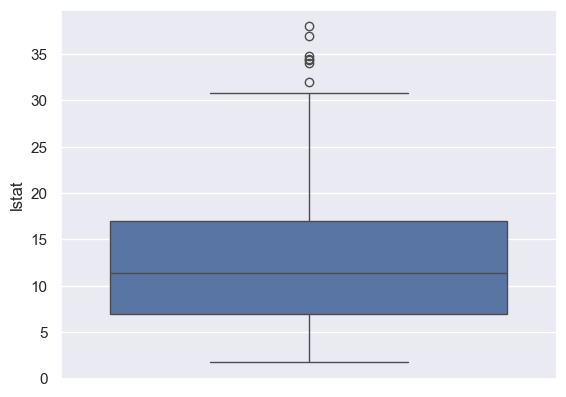

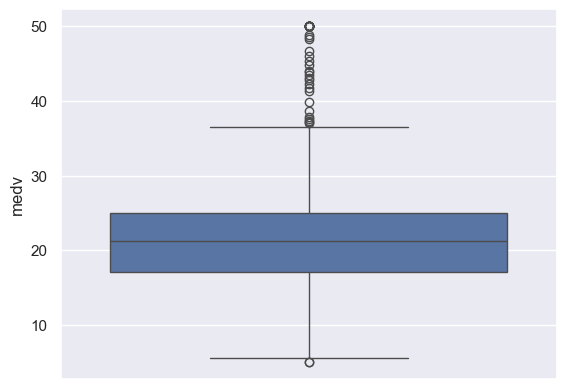

In [337]:
# boxplot

def boxplots(col):
    sns.boxplot(df[col])
    plt.show()

for i in list(df.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)


# spliting the data

In [338]:
# split the data into ind and dep variable
x = df.drop(['medv'],axis =1) # independent variable
y = df['medv']  #dependent variable

In [339]:
x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


# feature scaling

In [340]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)
x_scaler = pd.DataFrame(x_scaler, columns= x.columns)

In [341]:
x_scaler.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,-0.670292,0.918420,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.786937,-1.075562
1,-0.663951,-0.579471,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.786937,-0.492439
2,-0.663957,-0.579471,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.573171,-1.208727
3,-0.662422,-0.579471,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.667711,-1.361517
4,-0.651341,-0.579471,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.786937,-1.026501


# vif - variance inflation factor >5



In [342]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = x_scaler
vif = pd.DataFrame()
vif['Variable Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]
vif['features'] = x.columns

In [343]:
vif

,Variable Inflation Factor,features
0,9.386664,crim
1,2.426592,zn
2,4.013302,indus
3,1.075667,chas
4,4.420278,nox
5,1.905096,rm
6,3.071796,age
7,3.953187,dis
8,12.644016,rad
9,8.687814,tax


In [344]:
# rad has a highest vif = 12.65, hence dropping this variable
x_scaler = x_scaler.drop('rad', axis= 1)
x_scaler.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

# Spliting the  data into training and test for model Building and prediction

In [345]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 100)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(404, 13) (102, 13) (404,) (102,)


# 1st approach
## stats method - ols

### Bulding Linear Regression Model



In [346]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [347]:
regression = smf.OLS(endog = y_train,exog = x_train).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              708.0
Date:                Sun, 27 Jul 2025   Prob (F-statistic):                   2.33e-262
Time:                        00:49:19   Log-Likelihood:                         -1216.6
No. Observations:                 404   AIC:                                      2459.
Df Residuals:                     391   BIC:                                      2511.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.2402      0.232     -1.035      0.301      -0.696       0.216
zn             0.0484      0.031      1.538      0.125      -0.013       0.110
indus         -0.0133      0.074     -0.179      0.858      -0.159       0.133
chas           3.3633      0.966      3.482      0.001       1.464       5.263
nox           -7.0844      4.075     -1.738      0.083     -15.096       0.928
rm             4.8446      0.429     11.303      0.000       4.002       5.687
age           -0.0120      0.016     -0.768      0.443      -0.043       0.019
dis           -1.0389      0.232     -4.480      0.000      -1.495      -0.583
rad            0.2073      0.100      2.072      0.039       0.011       0.404
tax           -0.0079      0.004     -1.827      0.068      -0.016       0.001
ptratio       -0.6890      0.148     -4.658      0.000      -0.980      -0.398
b              0.0535      0.010      5.123      0.000       0.033       0.074
lstat         -0.4469      0.059     -7.603      0.000      -0.562      -0.331
==============================================================================
Omnibus:                      151.764   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              729.059
Skew:                           1.562   Prob(JB):                    4.86e-159
Kurtosis:                       8.793   Cond. No.                     9.44e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [348]:
x_scaler.shape

(506, 12)

In [349]:
y.shape

(506,)

In [350]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x_scaler,y,test_size=0.2,random_state= 100)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(404, 12) (102, 12) (404,) (102,)


In [351]:
regression = smf.OLS(endog=y_train,exog = x_train).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.108
Model:                            OLS   Adj. R-squared (uncentered):              0.081
Method:                 Least Squares   F-statistic:                              3.963
Date:                Sun, 27 Jul 2025   Prob (F-statistic):                    8.63e-06
Time:                        00:49:19   Log-Likelihood:                         -1839.9
No. Observations:                 404   AIC:                                      3704.
Df Residuals:                     392   BIC:                                      3752.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.8776      2.621     -0.335      0.738      -6.031       4.276
zn             1.7336      1.767      0.981      0.327      -1.740       5.207
indus         -1.5268      2.327     -0.656      0.512      -6.101       3.048
chas           1.6336      1.134      1.441      0.150      -0.595       3.863
nox           -1.5867      2.436     -0.651      0.515      -6.376       3.203
rm             1.9643      1.610      1.220      0.223      -1.201       5.130
age           -0.5527      2.046     -0.270      0.787      -4.574       3.469
dis           -4.6964      2.364     -1.987      0.048      -9.344      -0.049
tax            0.4024      2.791      0.144      0.885      -5.085       5.890
ptratio       -0.9195      1.577     -0.583      0.560      -4.020       2.181
b              1.2136      1.356      0.895      0.371      -1.453       3.880
lstat         -3.6723      2.004     -1.833      0.068      -7.612       0.267
==============================================================================
Omnibus:                       98.583   Durbin-Watson:                   0.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              263.897
Skew:                           1.165   Prob(JB):                     4.96e-58
Kurtosis:                       6.201   Cond. No.                         7.88
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# building simple linear regression

In [352]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)
LR.intercept_,LR.coef_


(22.574549242047052,
 array([ 0.63237048,  0.4770021 , -0.42274476,  0.92755331, -1.80363156,
         2.66584742, -0.29755435, -2.83886341, -0.52604476, -1.91462291,
         0.02268867, -3.89046482]))

In [353]:
print('Training accuracy',LR.score(x_train,y_train))
print()
print("test accuracy",LR.score(x_test,y_test))

Training accuracy 0.714448193223562

test accuracy 0.7209618215408953


In [354]:
from sklearn.metrics import r2_score

# regularization

## Lasso method

In [355]:

from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha = 0.3)
lasso_model.fit(x_train,y_train)

Lasso(alpha=0.3)

In [356]:
y_pred_train_lasso = lasso_model.predict(x_train)
y_pred_test_lasso = lasso_model.predict(x_test)

In [357]:
print("training accuracy",r2_score(y_train,y_pred_train_lasso))
print()
print('testing accuracy', r2_score(y_test,y_pred_test_lasso))

training accuracy 0.6983950670515358

testing accuracy 0.7091450286149854


# Ridge Method

In [358]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha = 0.3)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.3)

In [359]:
y_pred_train_ridge = ridge_model.predict(x_train)
y_pred_test_ridge = ridge_model.predict(x_test)

In [360]:
print('training accuracy', r2_score(y_train,y_pred_train_ridge))
print()
print('test accuracy',r2_score(y_test,y_pred_test_ridge))

training accuracy 0.7144475913128605

test accuracy 0.7209315883071359


# RandomForestRegressor

In [361]:
from sklearn.ensemble import RandomForestRegressor
randomforest_model = RandomForestRegressor()
randomforest_model.fit(x_train,y_train)

RandomForestRegressor()

In [362]:
y_pred_train_rf = randomforest_model.predict(x_train)
y_pred_test_rf = randomforest_model.predict(x_test)
rf_accuracy = y_test,y_pred_test_rf

In [363]:
print('training accuracy', r2_score(y_train,y_pred_train_rf))
print()
print('test accuracy',r2_score(y_test,y_pred_test_rf))

training accuracy 0.9820315533273001

test accuracy 0.8780092312824355


# Gradient Descent Regressor

In [364]:
from sklearn.linear_model import SGDRegressor
# whenever you use SGD method, make sure data is scaled
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

sgd = SGDRegressor()
sgd.fit(x_train,y_train)

SGDRegressor()

In [365]:
y_pred_train_sgd = sgd.predict(x_train)
y_pred_test_sgd = sgd.predict(x_test)

print('training accuracy',r2_score(y_train,y_pred_train_sgd))
print()
print('test accuracy', r2_score(y_test,y_pred_test_sgd))

training accuracy 0.7142877955138811

test accuracy 0.7287285417944447


In [366]:
print(f"LinearRegression :{LR.score(x_test,y_test)}")
print(f"Lasso_method : {r2_score(y_test,y_pred_test_lasso)}")
print(f"Ridge_method : {r2_score(y_test,y_pred_test_ridge)}")
print(f"RandomForestRegressor : {r2_score(y_test,y_pred_test_rf)}")
print(f"Gradient_descent_regressor : { r2_score(y_test,y_pred_test_sgd)}")


LinearRegression :0.7279116667862154
Lasso_method : 0.7091450286149854
Ridge_method : 0.7209315883071359
RandomForestRegressor : 0.8780092312824355
Gradient_descent_regressor : 0.7287285417944447


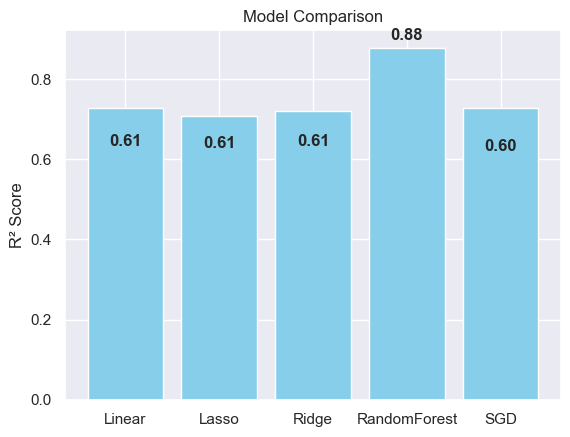

In [367]:
import matplotlib.pyplot as plt

models = ['Linear', 'Lasso', 'Ridge', 'RandomForest', 'SGD']
scores = [
    LR.score(x_test, y_test),
    r2_score(y_test, y_pred_test_lasso),
    r2_score(y_test, y_pred_test_ridge),
    r2_score(y_test, y_pred_test_rf),
    r2_score(y_test, y_pred_test_sgd)
]

plt.bar(models, scores, color='skyblue')
plt.ylabel("R² Score")
plt.title("Model Comparison")

# 4. Display the values on top of each bar
for i, v in enumerate(r2_scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
    
plt.show()
